# Housing Price Prediction – Evaluation & Diagnostics

This notebook focuses on evaluating and interpreting the final tuned model (**Gradient Boosting**).  
We load the saved model pipeline, evaluate its predictive performance on the test data, visualize residuals, and analyze feature importances.


### 1) Imports and Setup

In [1]:
# 1) Imports and Setup
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import joblib

from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import train_test_split, cross_val_score, KFold

## 2) Load Trained Model and Processed Data

We load the processed dataset and the previously trained Gradient Boosting model pipeline saved as a `.pkl` file.  
Then we split the data (80/20) in the same way as in the modeling notebook.


In [2]:
# 2) Load Model and Processed Data
import joblib
import pandas as pd
from sklearn.model_selection import train_test_split

# Load the saved trained pipeline
pipe = joblib.load('../notebooks/final_gradient_boosting_model.pkl')
print("Loaded trained Gradient Boosting model successfully.")

# Load processed dataset
df = pd.read_csv('../new_data_archive/processed_housing.csv')

# Drop unnecessary columns
df = df.drop(['id', 'zipcode'], axis=1)

# Define features and target
X = df.drop('price_log', axis=1)
y = df['price_log']

# Split data (same 80/20 split)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

print("Data loaded and split successfully.")


Loaded trained Gradient Boosting model successfully.
Data loaded and split successfully.


## 3) Evaluate Model on Test Data

We evaluate the final Gradient Boosting model on the test set using **MAE**, **RMSE**, and **R²** as metrics.


In [3]:
# 3) Evaluate Model on Test Data
y_pred = pipe.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print("Evaluation Results:")
print(f"MAE: {mae:.3f}")
print(f"RMSE: {rmse:.3f}")
print(f"R²: {r2:.3f}")

Evaluation Results:
MAE: 0.223
RMSE: 0.284
R²: 0.711


## 4) Residual Analysis

We visualize residuals to assess model fit and detect bias.  
Ideally, residuals should be randomly distributed around zero and roughly normal in distribution.

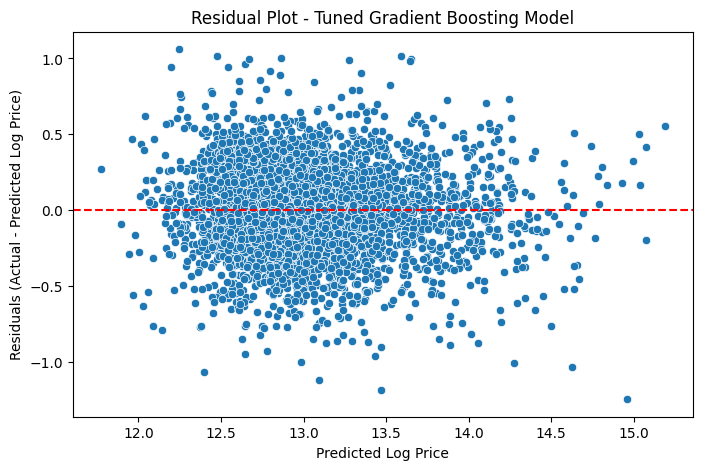

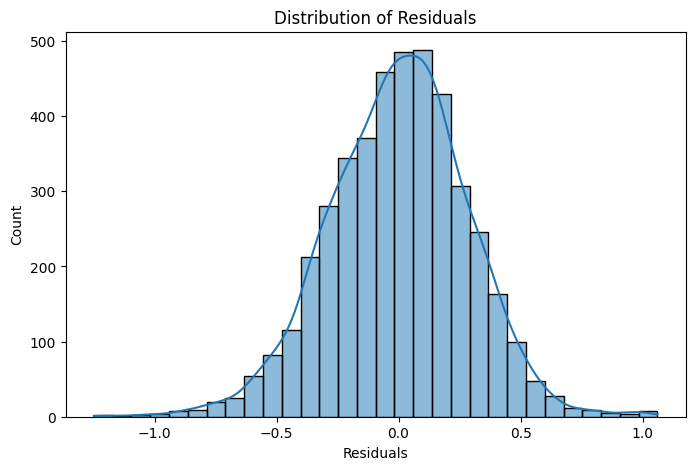

In [4]:
# 4) Residual Analysis
residuals = y_test - y_pred

# Residual scatter plot
plt.figure(figsize=(8,5))
sns.scatterplot(x=y_pred, y=residuals)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel("Predicted Log Price")
plt.ylabel("Residuals (Actual - Predicted Log Price)")
plt.title("Residual Plot - Tuned Gradient Boosting Model")
plt.show()

# Residual distribution
plt.figure(figsize=(8,5))
sns.histplot(residuals, bins=30, kde=True)
plt.title("Distribution of Residuals")
plt.xlabel("Residuals")
plt.show()

Residual analysis helps us understand **how well the Gradient Boosting model fits the data** and whether it makes consistent predictions across the price range.

# Residual Plot: Tuned Gradient Boosting Model
This scatter plot shows the **residuals (actual − predicted log prices)** against the **predicted log prices**.

- **Axes Explanation:**
  - **X-axis:** Predicted log prices (model’s predictions on a log scale)
  - **Y-axis:** Residuals (difference between actual and predicted log prices)

- **Interpretation:**
  - The **red dashed line** represents zero residuals — where predictions perfectly match the actual values.
  - The **random scatter** around this line indicates that the model’s errors are evenly distributed.
  - There’s **no clear pattern or funnel shape**, suggesting that the model doesn’t systematically overestimate or underestimate at any price level.
  - The balanced spread above and below zero shows **low bias** and consistent performance across different housing prices.

- **Conclusion:**
  - This confirms that the tuned Gradient Boosting model makes **stable and reliable predictions**, with residuals behaving as expected for a well-trained regression model.

---

# Distribution of Residuals
This histogram visualizes how the residuals are distributed overall.

- **Axes Explanation:**
  - **X-axis:** Residual values (actual − predicted log prices)
  - **Y-axis:** Count (number of observations per residual range)

- **Interpretation:**
  - The residuals form a **bell-shaped, nearly symmetric distribution** centered around zero.
  - This means most prediction errors are small and evenly balanced between over- and under-predictions.
  - The smooth curve overlay supports that the model’s residuals follow a roughly **normal distribution**, which is ideal for regression.
  - A few minor outliers exist, which is expected in housing data due to luxury or unique properties.

- **Conclusion:**
  - Together, these plots confirm that the **Gradient Boosting model generalizes well**, makes **unbiased predictions**, and exhibits **minimal error variance** which are key indicators of strong model performance.


## 5) Cross-Validation

To confirm the model’s stability, we apply **5-Fold Cross-Validation** on the training data and visualize the R² scores across folds.

Cross-Validation R² Scores: [0.7202814  0.71176693 0.71918358 0.72800349 0.70446629]
Mean R²: 0.717
Std Dev: 0.008


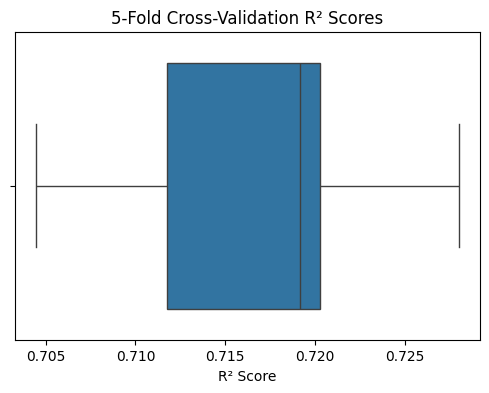

In [5]:
# 5) Cross-Validation
cv = KFold(n_splits=5, shuffle=True, random_state=42)
cv_scores = cross_val_score(pipe, X_train, y_train, cv=cv, scoring='r2')

print(f"Cross-Validation R² Scores: {cv_scores}")
print(f"Mean R²: {cv_scores.mean():.3f}")
print(f"Std Dev: {cv_scores.std():.3f}")

# Boxplot of CV results
plt.figure(figsize=(6,4))
sns.boxplot(x=cv_scores)
plt.title("5-Fold Cross-Validation R² Scores")
plt.xlabel("R² Score")
plt.show()

#### **Axes Explanation:**
- **X-axis:** Displays the **R² score**, which measures how much of the variation in housing prices the model can explain.  
- The **boxplot** shows the distribution and range of R² scores across the five folds.

---

#### **Interpretation:**
- The **mean R² score is approximately 0.717**, with a **standard deviation of 0.008**, meaning the model performs consistently across all validation folds.  
- The **narrow box** indicates very little variation in R² values, suggesting the model’s results are stable and not heavily influenced by data partitioning.  
- This consistency shows that the tuned Gradient Boosting model is **reliable** and **not overfitting** to specific folds.

---

#### **Conclusion:**
Overall, the model explains about **71.7% of the variance in housing prices** during cross-validation.  
The tight clustering of R² scores demonstrates strong generalization capability, confirming that the **Gradient Boosting model** is both **accurate** and **consistent** across multiple data splits.


## 6) Feature Importance

We examine the top predictors of housing prices using the Gradient Boosting model’s feature importances.

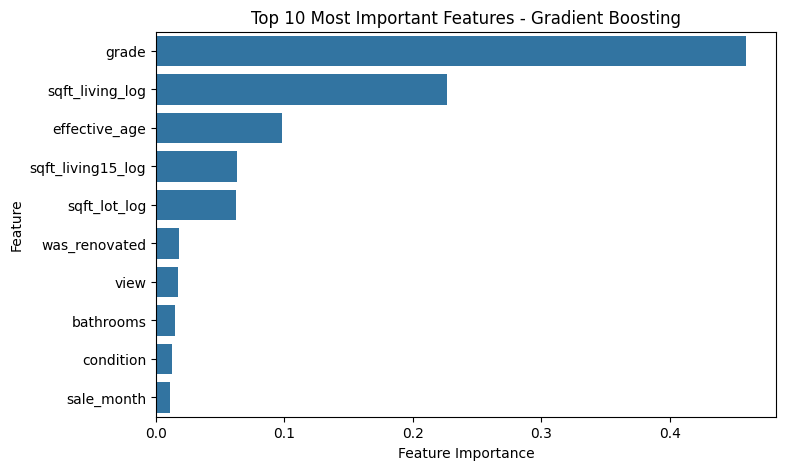

,Feature,Importance
5,grade,0.459560
8,sqft_living_log,0.226841
7,effective_age,0.098332
10,sqft_living15_log,0.063217
9,sqft_lot_log,0.062616
12,was_renovated,0.017738
3,view,0.016940
1,bathrooms,0.014702
4,condition,0.012224
6,sale_month,0.011141


In [6]:
# 6) Feature Importance
model = pipe.named_steps['model']

# Get feature names from preprocessing pipeline
feature_names = (
    pipe.named_steps['preprocessor']
    .transformers_[0][2] +  # scaled numeric features
    pipe.named_steps['preprocessor']
    .transformers_[1][2]    # binary features
)

importances = model.feature_importances_
feat_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
feat_df = feat_df.sort_values('Importance', ascending=False)

plt.figure(figsize=(8,5))
sns.barplot(x='Importance', y='Feature', data=feat_df.head(10))
plt.title('Top 10 Most Important Features - Gradient Boosting')
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.show()

feat_df.head(10)

### 6) Conclusion & Limitations

The **Tuned Gradient Boosting model** achieved strong predictive performance with **R² = 0.711**, **MAE = 0.223**, and **RMSE = 0.284**, confirming that it generalizes well to unseen data.  
Residual plots show errors are centered around zero with no visible trends, suggesting that the model captures the key patterns in housing prices without systematic bias.  

**Limitations:**  
- The model is based only on numeric and engineered features. Incorporating spatial or temporal variables could improve predictive accuracy.  
- Gradient Boosting can be computationally expensive and less interpretable compared to simpler models like Linear Regression.  

**Next Steps:**  
Future work might include expanding the feature set, performing deeper hyperparameter tuning, or comparing results with other ensemble models like XGBoost or Random Forest to confirm consistency in performance.

